In [57]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import keras
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras import optimizers
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
import random
import pickle
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [2]:
df  = pd.read_csv('cleaneddataset.csv')

In [3]:
df

,SiteName,Depth(m),Diver,ImageNumber,ImageAnalyzedNumber,"PhotoAnalyzed(0,1)",ReasonOmitted,ImageWidth(cm),ImageLength(cm),AreaPerPoint(cm^2),...,MixedChondrusTurfCorallina,JuvenileSaccharinaLatissima,MixedChondrusCoralina,MixedTurfCorallina,TotalPts,Kelp,algae1,algae2,rock,unknown
0,Nowlans Shoal,6,AB,8,1.0,1,NaN,178.84,100.53,200.0,...,NaN,NaN,NaN,NaN,91,26,24,41,0,0
1,Nowlans Shoal,6,AB,11,2.0,1,NaN,179.00,100.62,200.0,...,15.0,NaN,NaN,NaN,91,17,44,30,0,0
2,Nowlans Shoal,6,AB,14,3.0,1,NaN,172.65,97.05,175.0,...,NaN,NaN,NaN,NaN,91,10,35,46,0,0
3,Nowlans Shoal,6,AB,17,4.0,1,NaN,166.20,93.42,175.0,...,NaN,NaN,NaN,NaN,91,22,37,32,0,0
4,Nowlans Shoal,6,AB,20,5.0,1,NaN,184.24,103.57,200.0,...,0.0,0.0,0.0,2.0,91,13,26,52,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,Goose I,9,KA,27,NaN,1,NaN,196.23,110.31,225.0,...,3.0,NaN,NaN,NaN,91,85,3,0,0,3
1065,Goose I,9,KA,35,NaN,1,NaN,180.55,101.49,195.0,...,NaN,NaN,NaN,NaN,91,89,2,0,0,0
1066,Goose I,9,KA,41,NaN,1,NaN,193.99,109.05,220.0,...,1.0,NaN,NaN,NaN,91,89,1,0,0,1
1067,Goose I,9,KA,47,NaN,1,NaN,196.61,110.52,220.0,...,NaN,NaN,NaN,NaN,91,91,0,0,0,0


In [4]:
train_image = []
test_image = []
for i in tqdm(df.itertuples()):

    island = i.SiteName.replace(" ", "")
    # if(island=='TuffinI'):
    #     m_t = str(i[2]) + 'm'
    #     diver_t = m_t + '_' + i.Diver
    #     im_num_t = str(i.ImageNumber).zfill(3)
    #     im_name_t = island + str(i[2]) + i.Diver[0] + '_' + im_num_t
    #     img_t = image.load_img('EasternShoreIslandsKelpSurvey2018/' + island + "/" + diver_t + "/" + im_name_t +'.jpg', target_size=(500,500,3))
    #     img_t = image.img_to_array(img_t)
    #     img_t = img_t/255
    #     test_image.append(img_t)
    # else:
    m = str(i[2]) + 'm'
    diver = m + '_' + i.Diver
    im_num = str(i.ImageNumber).zfill(3)
    im_name = island + str(i[2]) + i.Diver[0] + '_' + im_num
    img = image.load_img('EasternShoreIslandsKelpSurvey2018/' + island + "/" + diver + "/" + im_name +'.jpg', target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)


X = np.array(train_image)
# X_test = np.array(test_image)

1069it [00:21, 49.84it/s]


In [13]:
print(X.shape)

(1069, 200, 200, 3)


In [14]:
X_test.shape

NameError: name 'X_test' is not defined

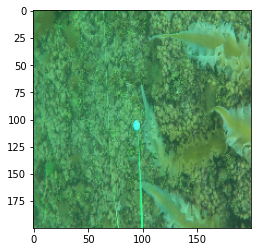

In [15]:
plt.imshow(X[3])

In [16]:
print(df.columns)

Index(['SiteName', 'Depth(m)', 'Diver', 'ImageNumber', 'ImageAnalyzedNumber',
       'PhotoAnalyzed(0,1)', 'ReasonOmitted', 'ImageWidth(cm)',
       'ImageLength(cm)', 'AreaPerPoint(cm^2)', 'Total', 'NullPoint',
       'SaccharinaLatissima', 'LaminariaDigitata', 'AgarumClathratum',
       'AlariaEsculenta', 'SacchorizaDermatodea', 'UnidentifiedKelp',
       'ZosteraMarina', 'CodiumFragile', 'Fucusspp', 'Turf', 'ChondusCrispus',
       'PalmariaPalmata', 'CorallineAlgae', 'Desmarestiaspp',
       'UnifentifiedAlgae', 'Bedrock', 'Boulder', 'Cobble', 'Pebble', 'Sand',
       'PlumbLine', 'Unknown', 'MembraniporaMembranacea', 'MixedChondrusTurf',
       'CorallinaOfficinalis', 'MixedChondrusTurfCorallina',
       'JuvenileSaccharinaLatissima', 'MixedChondrusCoralina',
       'MixedTurfCorallina', 'TotalPts', 'Kelp', 'algae1', 'algae2', 'rock',
       'unknown'],
      dtype='object')


In [17]:
y_train = df[['Kelp', 'algae1', 'algae2', 'rock', 'unknown']]

In [18]:
y_train = y_train.fillna(0)

In [19]:
y_train.head(10)


,Kelp,algae1,algae2,rock,unknown
0,26,24,41,0,0
1,17,44,30,0,0
2,10,35,46,0,0
3,22,37,32,0,0
4,13,26,52,0,0
5,14,44,30,3,0
6,10,28,53,0,0
7,18,31,42,0,0
8,9,47,35,0,0
9,32,19,40,0,0


In [20]:
y_train = y_train.astype(bool).astype(int)

In [21]:
y_train

,Kelp,algae1,algae2,rock,unknown
0,1,1,1,0,0
1,1,1,1,0,0
2,1,1,1,0,0
3,1,1,1,0,0
4,1,1,1,0,0
...,...,...,...,...,...
1064,1,1,0,0,1
1065,1,1,0,0,0
1066,1,1,0,0,1
1067,1,0,0,0,0


In [22]:
y_train['Kelp'].value_counts()

1    1038
0      31
Name: Kelp, dtype: int64

In [23]:
# y_train = y_train.div(y_train.sum(axis=1), axis=0)
# y_test = y_test.div(y_test.sum(axis=1), axis=0)

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y_train, test_size=0.20, random_state=42, stratify=y_train)


In [25]:
ytrain = np.array(y_train)
yval = np.array(y_val)

In [36]:
import os
def resnet50_model(classes=1000, *args, **kwargs):
    # Load a model if we have saved one
    if(os.path.isfile('C:\\DATA\\Python-data\\CIFAR-10\\models\\resnet_50.h5') == True):
        return keras.models.load_model('C:\\DATA\\Python-data\\CIFAR-10\\models\\resnet_50.h5')
    # Create an input layer
    input = keras.layers.Input(shape=(None, None, 3))
    # Create output layers
    output = keras.layers.ZeroPadding2D(padding=3, name='padding_conv1')(input)
    output = keras.layers.Conv2D(64, (7, 7), strides=(2, 2), use_bias=False, name='conv1')(output)
    output = keras.layers.BatchNormalization(axis=3, epsilon=1e-5, name='bn_conv1')(output)
    output = keras.layers.Activation('relu', name='conv1_relu')(output)
    output = keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='pool1')(output)
    output = conv_block(output, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    output = identity_block(output, 3, [64, 64, 256], stage=2, block='b')
    output = identity_block(output, 3, [64, 64, 256], stage=2, block='c')
    output = conv_block(output, 3, [128, 128, 512], stage=3, block='a')
    output = identity_block(output, 3, [128, 128, 512], stage=3, block='b')
    output = identity_block(output, 3, [128, 128, 512], stage=3, block='c')
    output = identity_block(output, 3, [128, 128, 512], stage=3, block='d')
    output = conv_block(output, 3, [256, 256, 1024], stage=4, block='a')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='b')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='c')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='d')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='e')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='f')
    output = conv_block(output, 3, [512, 512, 2048], stage=5, block='a')
    output = identity_block(output, 3, [512, 512, 2048], stage=5, block='b')
    output = identity_block(output, 3, [512, 512, 2048], stage=5, block='c')
    output = keras.layers.GlobalAveragePooling2D(name='pool5')(output)
    output = keras.layers.Dense(classes, activation='sigmoid', name='fc1000')(output)

    model = keras.models.Model(inputs=input, outputs=output, *args, **kwargs)

    print()
    print(model.summary(), '\n')

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [37]:
def identity_block(input, kernel_size, filters, stage, block):
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    output = keras.layers.Conv2D(filters1, (1, 1), kernel_initializer='he_normal', name=conv_name_base + '2a')(input)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2a')(output)
    output = keras.layers.Activation('relu')(output)
    output = keras.layers.Conv2D(filters2, kernel_size, padding='same', kernel_initializer='he_normal', name=conv_name_base + '2b')(output)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2b')(output)
    output = keras.layers.Activation('relu')(output)
    output = keras.layers.Conv2D(filters3, (1, 1), kernel_initializer='he_normal', name=conv_name_base + '2c')(output)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2c')(output)
    output = keras.layers.add([output, input])
    output = keras.layers.Activation('relu')(output)
    return output

In [38]:
# Create a convolution block
def conv_block(input, kernel_size, filters, stage, block, strides=(2, 2)):
    # Variables
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    # Create block layers
    output = keras.layers.Conv2D(filters1, (1, 1), strides=strides, kernel_initializer='he_normal', name=conv_name_base + '2a')(input)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2a')(output)
    output = keras.layers.Activation('relu')(output)
    output = keras.layers.Conv2D(filters2, kernel_size, padding='same', kernel_initializer='he_normal', name=conv_name_base + '2b')(output)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2b')(output)
    output = keras.layers.Activation('relu')(output)
    output = keras.layers.Conv2D(filters3, (1, 1), kernel_initializer='he_normal', name=conv_name_base + '2c')(output)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2c')(output)
    shortcut = keras.layers.Conv2D(filters3, (1, 1), strides=strides, kernel_initializer='he_normal', name=conv_name_base + '1')(input)
    shortcut = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '1')(shortcut)
    output = keras.layers.add([output, shortcut])
    output = keras.layers.Activation('relu')(output)
    # Return a block
    return output

In [45]:
# Train a model
def train():
    epochs = 25
    model = resnet50_model(5)
    early_stopping = EarlyStopping(patience=15, monitor='val_loss', min_delta=1e-3, verbose=1)
    reduce_lr = ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.00001, verbose=1)
    # Create a data generator for training
    datagen_args = dict(
        brightness_range=[0.2,1.0],
        rotation_range=30,
        shear_range = 0.2,
        horizontal_flip=True,
        vertical_flip =True)

    # Create a train generator
    image_datagen = ImageDataGenerator(**datagen_args)

    train_generator = image_datagen.flow(X_train, ytrain, batch_size=32, shuffle=True, seed=7)

    #validation_generator = image_datagen.flow(X_val, yval, batch_size=32, shuffle=True, seed=7)

    history = model.fit_generator(
        train_generator,
        validation_data=(X_val, yval),
        epochs=epochs, callbacks=[early_stopping, reduce_lr])
    # Save model to disk
    model.save('D:/Kelp Species Detection/OneDrive_2022-03-25/KIWI training data/models/resnet_50.h5')
    print('Saved model to disk!')
    return history

if __name__ == '__main__':
    history = train()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 padding_conv1 (ZeroPadding2D)  (None, None, None,   0           ['input_5[0][0]']                
                                3)                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, None, None,   9408        ['padding_conv1[0][0]']          
                                64)                                                        

C:\Users\gawai\AppData\Local\Temp\ipykernel_26908\2068516668.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
27/27 [==============================] - 116s 4s/step - loss: 0.6277 - accuracy: 0.8117 - val_loss: 38000.9805 - val_accuracy: 0.9673 - lr: 0.0010
Epoch 2/25
27/27 [==============================] - 113s 4s/step - loss: 0.5328 - accuracy: 0.8608 - val_loss: 744379.7500 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/25
27/27 [==============================] - 114s 4s/step - loss: 0.4983 - accuracy: 0.8702 - val_loss: 1785966.7500 - val_accuracy: 0.9673 - lr: 0.0010
Epoch 4/25
27/27 [==============================] - 116s 4s/step - loss: 0.4833 - accuracy: 0.9228 - val_loss: 905.0823 - val_accuracy: 0.9673 - lr: 0.0010
Epoch 5/25
27/27 [==============================] - 113s 4s/step - loss: 0.4680 - accuracy: 0.9029 - val_loss: 17.8394 - val_accuracy: 0.9673 - lr: 0.0010
Epoch 6/25
27/27 [==============================] - 113s 4s/step - loss: 0.4655 - accuracy: 0.9099 - val_loss: 91919.0469 - val_accuracy: 0.9673 - lr: 0.0010
Epoch 7/25
27/27 [==============================] 

In [46]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


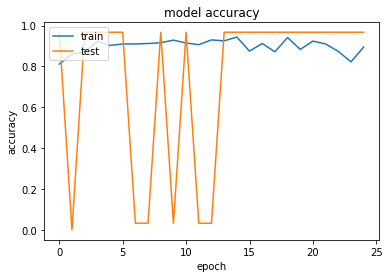

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

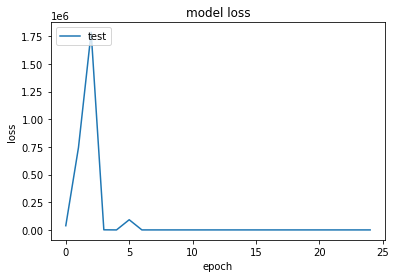

In [61]:
# plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

In [65]:
model = keras.models.load_model('models/resnet_50.h5')

In [52]:
y_pred = model.predict(X_val)

In [58]:
precision = precision_score(yval, y_pred, average=None)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [64]:
imgtest = image.load_img('EasternShoreIslandsKelpSurvey2018/BirdI/6m_KA/BirdI6K_011.jpg', target_size=(200,200,3))
imgtest = image.img_to_array(imgtest)
imgtest = imgtest/255

[[0.99076885 0.9611899  0.5009805  0.18172103 0.27646968]]
[0 1 2 4 3]
Kelp (0.991)
algae1 (0.961)
algae2 (0.501)
unknown (0.276)
rock (0.182)


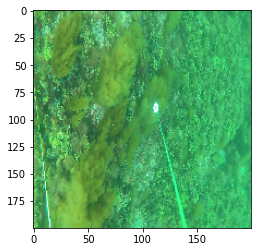

In [66]:
classes = np.array(y_val.columns)
proba = model.predict(imgtest.reshape(1,200,200,3))
print(proba)
top_3 = np.argsort(proba[0])[:-6:-1]
print(top_3)
for i in range(5):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(imgtest)